<a href="https://colab.research.google.com/github/WNderitu/data_science_capstone_project/blob/main/malaria_parasite_object_detection_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plasmodium Vivax (malaria) parasite detector and counter**

## **1.0 Introduction**

## **1.1 Problem Statement**

## **1.2 Objectives**

1. To detect Plasmodium Vivax (malaria parasite) in human cells
2. To count the number of detected plasmodium vivax parasites per image

## **1.3 Image dataset**

Dataset courced from: https://bbbc.broadinstitute.org/BBBC041/

The dataset consists of:
- image folder
- training json file
- test json file

The dataset consists of 1,328 microscopic images of blood smears

## **1.4 Installing & Importing Required Libraries**

In [1]:
!pip install Pillow #installing PILLOW LIBRARY

In [2]:
!pip install matplotlib

In [4]:
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 4.8 MB/s eta 0:00:00


In [57]:
!pip install pyyaml

In [15]:
import os
import json
import random
from pprint import pprint #
import PIL
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from collections import Counter
import hashlib # find identical images
from collections import defaultdict
import imagehash # find visually identical images
import numpy as np

## **1.5 Loading & Understanding Malaria Dataset structure**

In [16]:
# Check current directory
print("Current directory:", os.getcwd())

# List files and folders
print("Contents here:", os.listdir())

# If you see 'images', list inside it
if 'images' in os.listdir():
    print("Example image files:", os.listdir('images')[:10])

Current directory: /content/drive/MyDrive/malaria
Contents here: ['training.json', 'test.json', '.DS_Store', 'images']
Example image files: ['3d302619-473d-4c5b-af43-8833ff94233f.png', 'ac4d6507-d710-497b-ad7c-e0dd75c1d06d.png', 'c8fd1336-dd0a-4f97-abbf-be2c18b91e02.png', '7d65d296-0f7b-41cc-9073-a547e24326c8.png', 'd67fb447-4dd7-4a82-a305-2b70927b69bb.png', '471f75c6-bd5d-4c20-bcc1-258e836f4d69.png', '84d7545e-c3a8-4b1f-9a39-36aab78c8699.png', '3b13e20f-ec0d-44ec-b2f4-eaebfa09150e.png', 'dca685a8-a609-45d8-93d7-da1e4165b9bd.png', '781d4bea-c6a9-4b36-ae10-ba9e328c87fe.png']


the image files are in png format

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# open malaria folder in google drive
%cd /content/drive/MyDrive/malaria

/content/drive/MyDrive/malaria


In [18]:
# Look inside the malaria folder
print("Contents of malaria/:", os.listdir("/content/drive/MyDrive/malaria"))

Contents of malaria/: ['training.json', 'test.json', '.DS_Store', 'images']


In [19]:
# List all files ending in common image extensions
# Path to your images
image_folder = "/content/drive/MyDrive/malaria/images"

image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# print the results
print(f"Number of images in '{image_folder}': {len(image_files)}")
print("Example files:", image_files[:5])

Number of images in '/content/drive/MyDrive/malaria/images': 1328
Example files: ['3d302619-473d-4c5b-af43-8833ff94233f.png', 'ac4d6507-d710-497b-ad7c-e0dd75c1d06d.png', 'c8fd1336-dd0a-4f97-abbf-be2c18b91e02.png', '7d65d296-0f7b-41cc-9073-a547e24326c8.png', 'd67fb447-4dd7-4a82-a305-2b70927b69bb.png']


In [23]:
# Load training JSON file from google drive
train_data = json.load(open("training.json"))

In [24]:
# Load test JSON file from google drive
test_data = json.load(open("test.json"))

In [25]:
# check format of training JSON files
print(f"Type of JSON root: {type(train_data)}")
print(f"Number of items: {len(train_data)}")

# show first example
print("\nFirst entry:")
pprint(train_data[0])

Type of JSON root: <class 'list'>
Number of items: 1208

First entry:
{'image': {'checksum': '676bb8e86fc2dbf05dd97d51a64ac0af',
           'pathname': '/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png',
           'shape': {'c': 1600, 'channels': 3, 'r': 1200}},
 'objects': [{'bounding_box': {'maximum': {'c': 1540, 'r': 1158},
                               'minimum': {'c': 1440, 'r': 1057}},
              'category': 'red blood cell'},
             {'bounding_box': {'maximum': {'c': 1403, 'r': 971},
                               'minimum': {'c': 1303, 'r': 868}},
              'category': 'red blood cell'},
             {'bounding_box': {'maximum': {'c': 1008, 'r': 689},
                               'minimum': {'c': 900, 'r': 578}},
              'category': 'red blood cell'},
             {'bounding_box': {'maximum': {'c': 713, 'r': 408},
                               'minimum': {'c': 611, 'r': 304}},
              'category': 'red blood cell'},
             {'bounding_box': {'m

In [26]:
# check format of test JSON files
print(f"Type of JSON root: {type(test_data)}")
print(f"Number of items: {len(test_data)}")

# show first example
print("\nFirst entry:")
pprint(test_data[0])

Type of JSON root: <class 'list'>
Number of items: 120

First entry:
{'image': {'checksum': 'eea3bfd6a929bcb06f9786667cd3fbb2',
           'pathname': '/images/41be1bd3-0d31-4881-bf1f-3ccdfa21ff12.jpg',
           'shape': {'c': 1944, 'channels': 3, 'r': 1383}},
 'objects': [{'bounding_box': {'maximum': {'c': 1883, 'r': 708},
                               'minimum': {'c': 1744, 'r': 576}},
              'category': 'red blood cell'},
             {'bounding_box': {'maximum': {'c': 1373, 'r': 977},
                               'minimum': {'c': 1249, 'r': 863}},
              'category': 'red blood cell'},
             {'bounding_box': {'maximum': {'c': 1711, 'r': 335},
                               'minimum': {'c': 1573, 'r': 210}},
              'category': 'red blood cell'},
             {'bounding_box': {'maximum': {'c': 1253, 'r': 1142},
                               'minimum': {'c': 1124, 'r': 1017}},
              'category': 'red blood cell'},
             {'bounding_box': {

In [32]:
# Check the type
print(f"Type of JSON root: {type(train_data)}")
print(f"Number of items: {len(train_data)}")

# Show first example
print("\nFirst entry:")
pprint(train_data[0])

Type of JSON root: <class 'list'>
Number of items: 1208

First entry:
{'image': {'checksum': '676bb8e86fc2dbf05dd97d51a64ac0af',
           'pathname': '/images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png',
           'shape': {'c': 1600, 'channels': 3, 'r': 1200}},
 'objects': [{'bounding_box': {'maximum': {'c': 1540, 'r': 1158},
                               'minimum': {'c': 1440, 'r': 1057}},
              'category': 'red blood cell'},
             {'bounding_box': {'maximum': {'c': 1403, 'r': 971},
                               'minimum': {'c': 1303, 'r': 868}},
              'category': 'red blood cell'},
             {'bounding_box': {'maximum': {'c': 1008, 'r': 689},
                               'minimum': {'c': 900, 'r': 578}},
              'category': 'red blood cell'},
             {'bounding_box': {'maximum': {'c': 713, 'r': 408},
                               'minimum': {'c': 611, 'r': 304}},
              'category': 'red blood cell'},
             {'bounding_box': {'m

In [27]:
# check every image listed in training.json actually exists in images folder
train_json_images = [os.path.basename(item["image"]["pathname"]) for item in train_data]
missing = [img for img in train_json_images if img not in image_files]

print(f"train JSON images: {len(train_json_images)}")
print(f"Found in image folder: {len(image_files)}")
print(f"Missing images: {len(missing)}")

if missing:
    print("Missing examples:", missing[:5])


train JSON images: 1208
Found in image folder: 1328
Missing images: 0


In [33]:
# check every image listed in test.json actually exists in images folder
test_json_images = [os.path.basename(item["image"]["pathname"]) for item in test_data]
missing = [img for img in test_json_images if img not in image_files]

print(f"test JSON images: {len(test_json_images)}")
print(f"Found in image folder: {len(image_files)}")
print(f"Missing images: {len(missing)}")

if missing:
    print("Missing examples:", missing[:5])

test JSON images: 120
Found in image folder: 1328
Missing images: 0


In [34]:
# Collect all category names from all images
all_categories = []

for item in train_data:
    for obj in item["objects"]:
        cat = obj["category"].lower().strip()
        all_categories.append(cat)

# Count occurrences
category_counts = Counter(all_categories)

# Display summary
print("📊 Category Summary (All objects):\n")
for cat, count in category_counts.items():
    print(f"{cat.title():<25}: {count}")

# Optionally, show total objects
total = sum(category_counts.values())
print(f"\nTotal objects (all categories): {total}")

📊 Category Summary (All objects):

Red Blood Cell           : 77420
Trophozoite              : 1473
Schizont                 : 179
Difficult                : 441
Ring                     : 353
Leukocyte                : 103
Gametocyte               : 144

Total objects (all categories): 80113


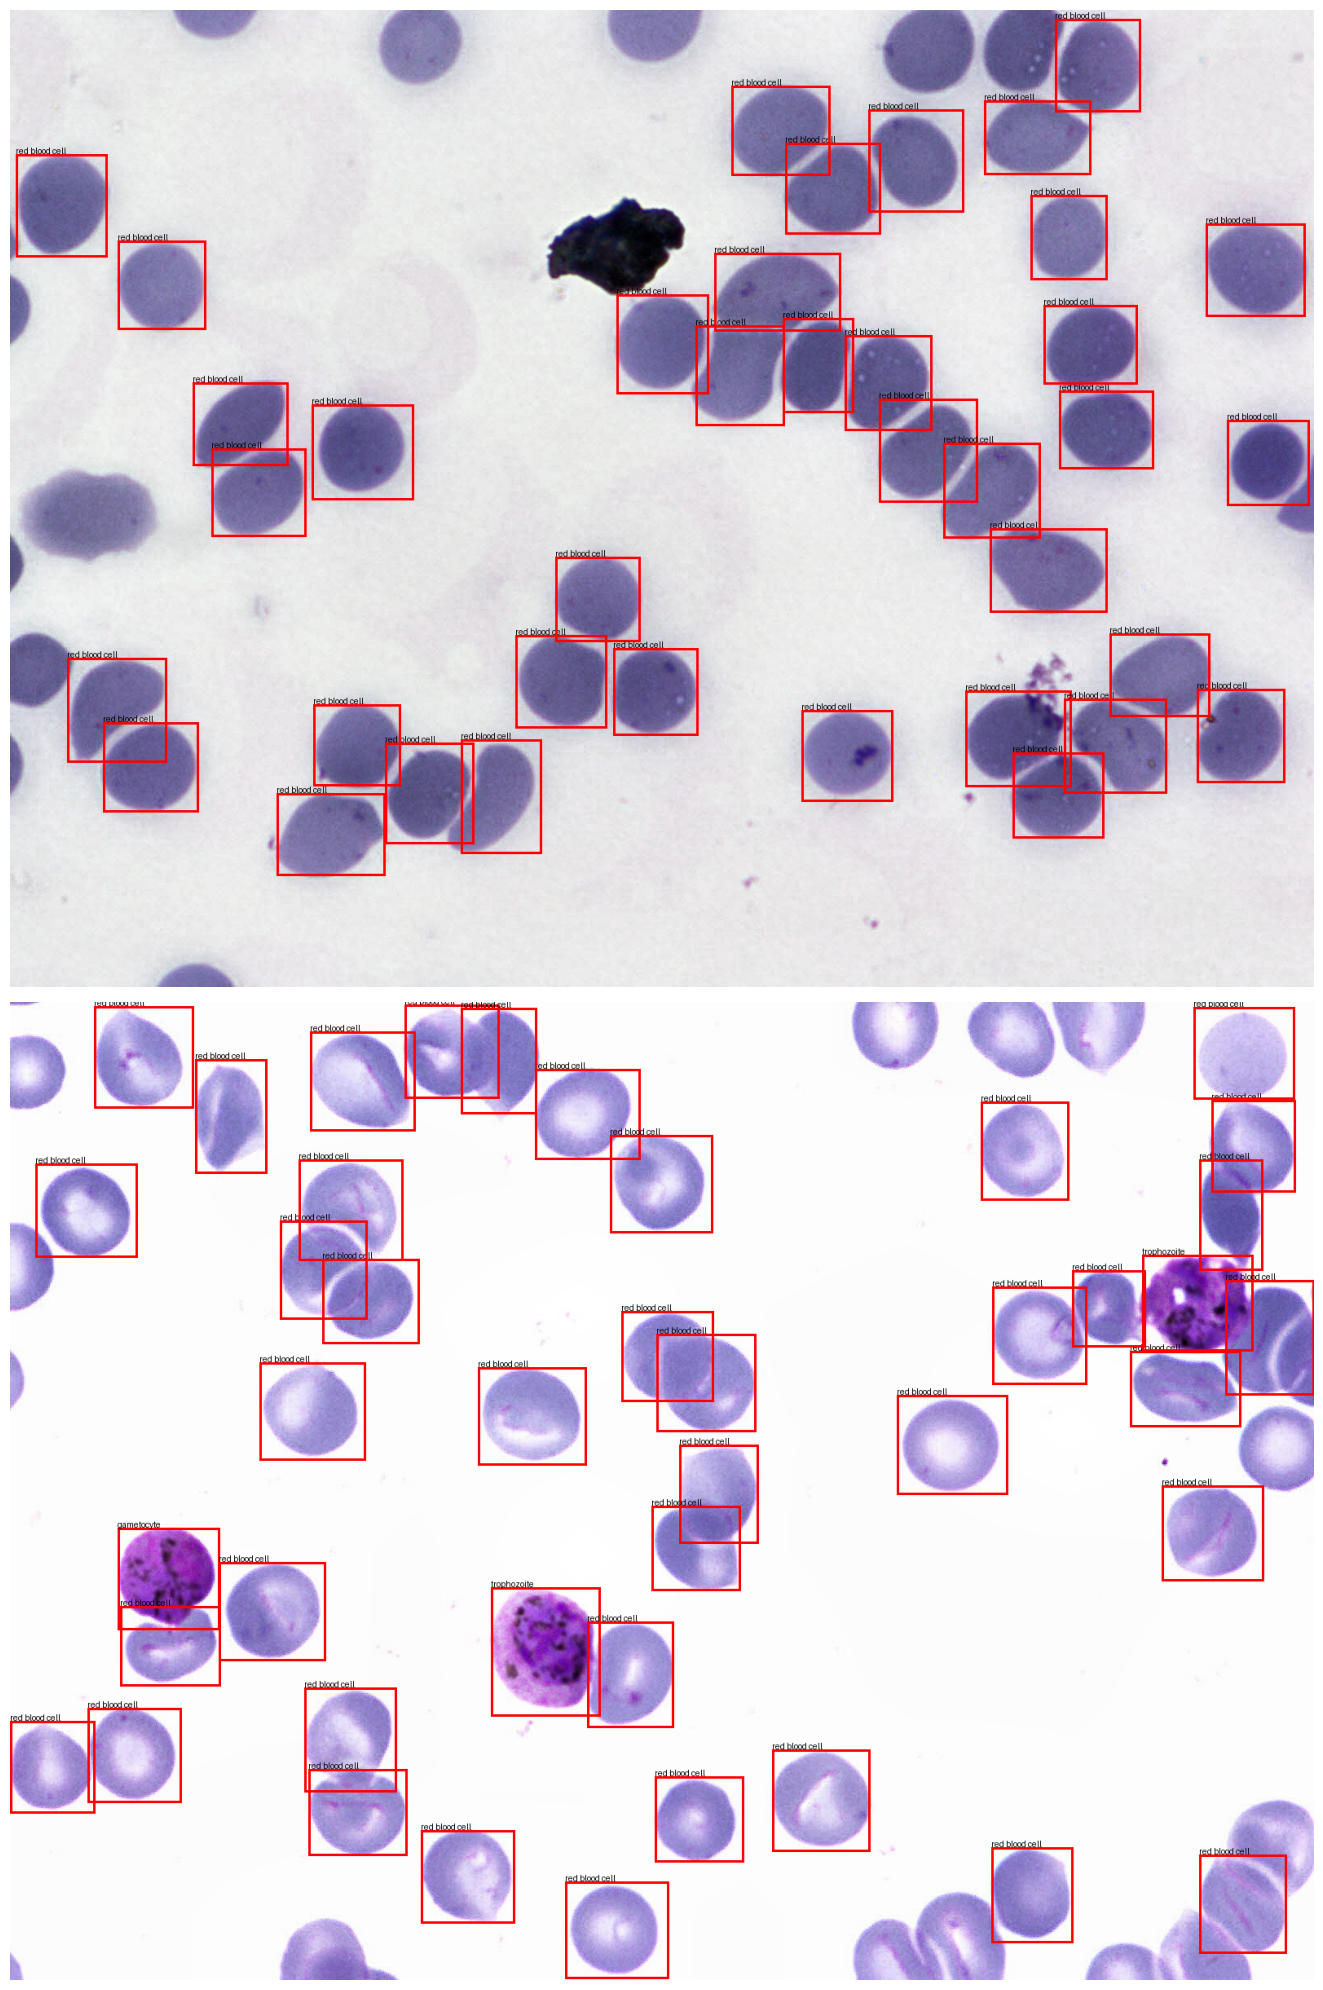

In [39]:
# view 2 train images with the annotations and categories
# Randomly sample 2 images
train_samples = random.sample(train_data,2)

# Try loading a font (fallback to default)
try:
    font = ImageFont.truetype("arial.ttf",34)
except:
    font = ImageFont.load_default()

plt.figure(figsize=(20,20))

for idx, sample in enumerate(train_samples):
    img_path = os.path.join("images", os.path.basename(sample["image"]["pathname"]))
    img = Image.open(img_path).convert("RGB")

    draw = ImageDraw.Draw(img)
    for obj in sample["objects"]:
        box = obj["bounding_box"]
        xmin, ymin = box["minimum"]["c"], box["minimum"]["r"]
        xmax, ymax = box["maximum"]["c"], box["maximum"]["r"]
        category = obj["category"]
        draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=3)
        draw.text((xmin, ymin - 10), category, fill="black", font=font)

    plt.subplot(2, 1, idx + 1)
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.show()

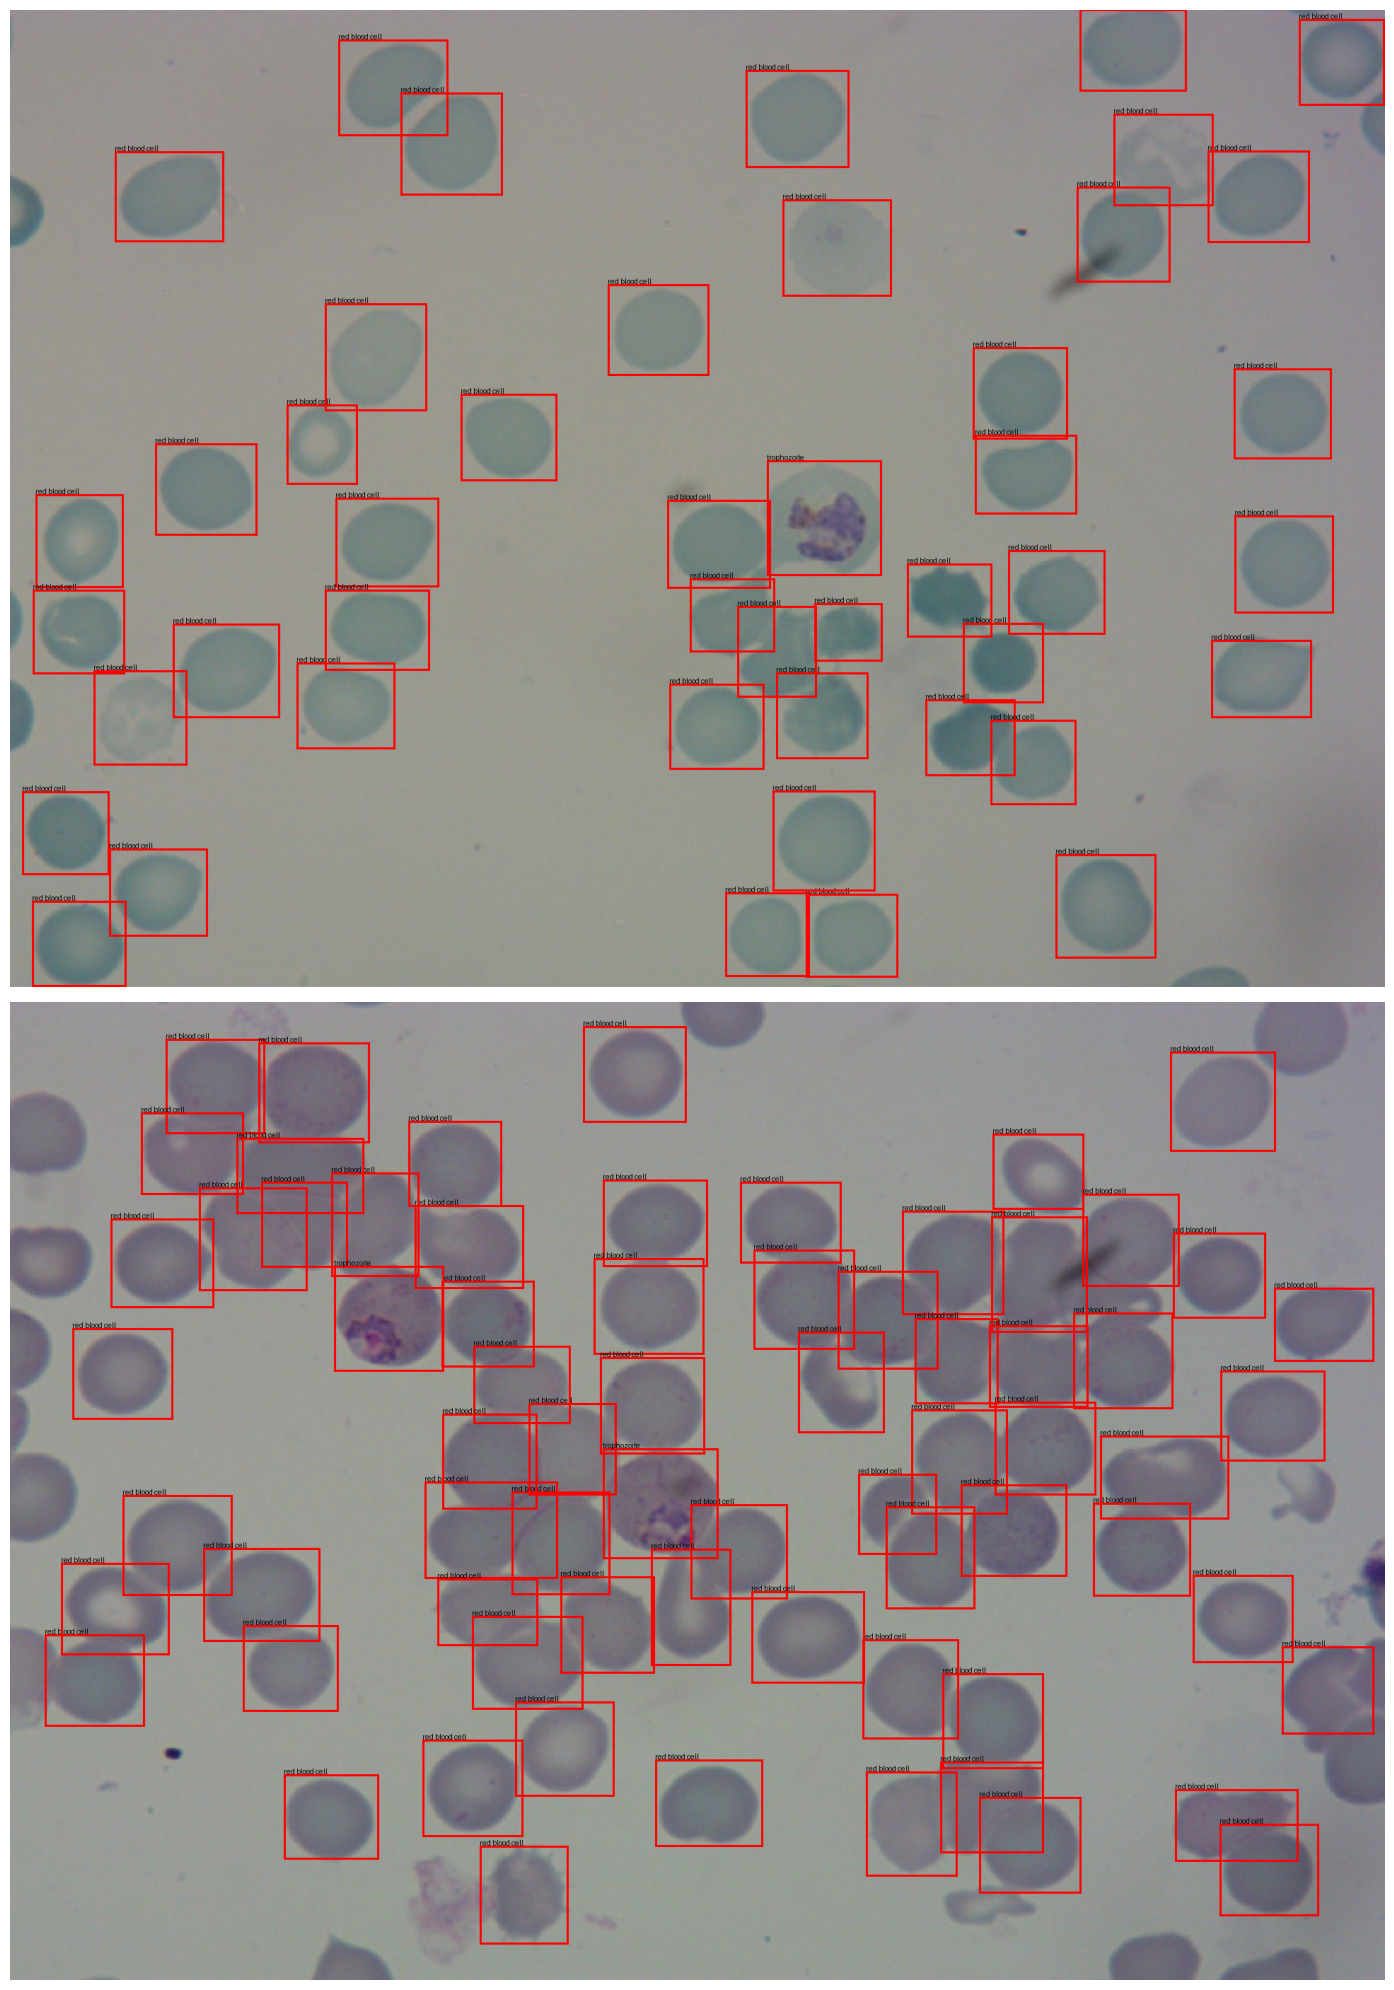

In [40]:
# view 2 test images with the annotations and categories
# Randomly sample 2 images
test_samples = random.sample(test_data,2)

# Try loading a font (fallback to default)
try:
    font = ImageFont.truetype("arial.ttf",34)
except:
    font = ImageFont.load_default()

plt.figure(figsize=(20,20))

for idx, sample in enumerate(test_samples):
    img_path = os.path.join("images", os.path.basename(sample["image"]["pathname"]))
    img = Image.open(img_path).convert("RGB")

    draw = ImageDraw.Draw(img)
    for obj in sample["objects"]:
        box = obj["bounding_box"]
        xmin, ymin = box["minimum"]["c"], box["minimum"]["r"]
        xmax, ymax = box["maximum"]["c"], box["maximum"]["r"]
        category = obj["category"]
        draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=3)
        draw.text((xmin, ymin - 10), category, fill="black", font=font)

    plt.subplot(2, 1, idx + 1)
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.show()

## 1.6 Data Cleaning

In [42]:
# Check for corrupted images & remove
# Open each image and skip unreadable files
image_folder = "/content/drive/MyDrive/malaria/images"

for fname in os.listdir(image_folder):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        try:
            img = Image.open(os.path.join(image_folder, fname))
            img.verify()  # checks for corruption
        except Exception as e:
            print("Corrupt image removed:", fname)
            os.remove(os.path.join(image_folder, fname))

In [43]:
# check duplicate images
# Function to compute hash
def file_hash(filepath):
    with open(filepath, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

# Compute hashes for all images
hash_dict = defaultdict(list)
for filename in os.listdir(image_folder):
    if filename.lower().endswith((".jpg", ".png", ".jpeg")):
        path = os.path.join(image_folder, filename)
        h = file_hash(path)
        hash_dict[h].append(filename)

# Report duplicates
duplicates = {h: files for h, files in hash_dict.items() if len(files) > 1}

print(f"Found {len(duplicates)} groups of duplicate images.")
for h, files in list(duplicates.items())[:5]:  # show first 5 examples
    print("→", files)

Found 0 groups of duplicate images.


In [44]:
# check visually similar images
hash_dict = defaultdict(list)

for filename in os.listdir(image_folder):
    if filename.lower().endswith((".jpg", ".png", ".jpeg")):
        path = os.path.join(image_folder, filename)
        img = Image.open(path)
        h = str(imagehash.phash(img))  # perceptual hash
        hash_dict[h].append(filename)

duplicates = {h: files for h, files in hash_dict.items() if len(files) > 1}

print(f"Found {len(duplicates)} visually duplicate groups.")
for h, files in list(duplicates.items())[:5]:
    print("→", files)

Found 1 visually duplicate groups.
→ ['3061aac0-cda3-47d1-8c48-6293e9ffdf36.png', 'f329e01b-fbd3-4fb5-9738-a7ff4c8622b8.png']


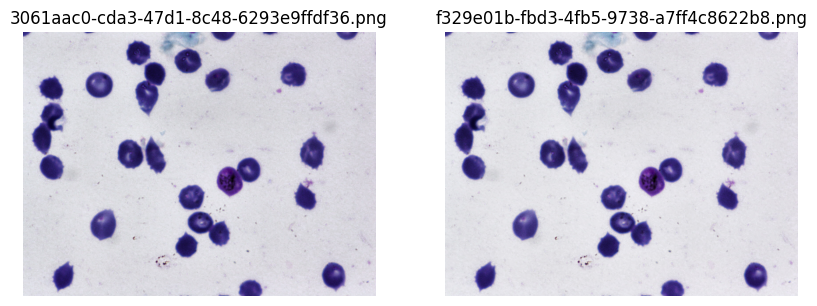

In [45]:
# Show the first two duplicates side by side
imgs = [Image.open(os.path.join(image_folder, f)) for f in files[:2]]
plt.figure(figsize=(10,4))
for i, img in enumerate(imgs):
    plt.subplot(1,2,i+1)
    plt.imshow(img)
    plt.title(files[i])
    plt.axis("off")
plt.show()

TRAIN set:
difficult: 441 (0.55%)
gametocyte: 144 (0.18%)
leukocyte: 103 (0.13%)
red blood cell: 77420 (96.64%)
ring: 353 (0.44%)
schizont: 179 (0.22%)
trophozoite: 1473 (1.84%)

 TEST set:
difficult: 5 (0.08%)
gametocyte: 12 (0.20%)
leukocyte: 0 (0.00%)
red blood cell: 5614 (94.80%)
ring: 169 (2.85%)
schizont: 11 (0.19%)
trophozoite: 111 (1.87%)


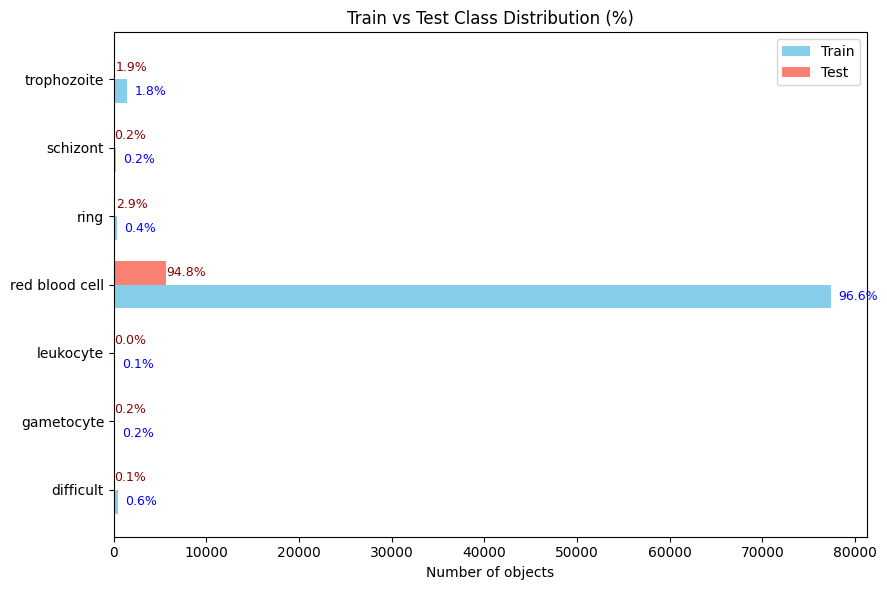

In [49]:
# check class imbalance
# function to load class counts from a JSON file
def get_class_counts(json_path):
    with open(json_path) as f:
        data = json.load(f)
    if isinstance(data[0], list):
        data = data[0]
    categories = []
    for item in data:
        for obj in item["objects"]:
            categories.append(obj["category"])
    counts = Counter(categories)
    total = sum(counts.values())
    percentages = {cls: (count / total) * 100 for cls, count in counts.items()}
    return counts, percentages

# Load training and test sets ---
train_counts, train_perc = get_class_counts("/content/drive/MyDrive/malaria/training.json")
test_counts, test_perc = get_class_counts("/content/drive/MyDrive/malaria/test.json")

# Ensure consistent class order
all_classes = sorted(set(train_counts.keys()) | set(test_counts.keys()))

# Prepare data
train_vals = [train_counts.get(c, 0) for c in all_classes]
test_vals = [test_counts.get(c, 0) for c in all_classes]
train_pct = [train_perc.get(c, 0) for c in all_classes]
test_pct = [test_perc.get(c, 0) for c in all_classes]

# Print summary
print("TRAIN set:")
for c in all_classes:
    print(f"{c}: {train_counts.get(c, 0)} ({train_perc.get(c, 0):.2f}%)")
print("\n TEST set:")
for c in all_classes:
    print(f"{c}: {test_counts.get(c, 0)} ({test_perc.get(c, 0):.2f}%)")

# Plot side by side horizontal bars
y = np.arange(len(all_classes))
bar_height = 0.35

plt.figure(figsize=(9, 6))
plt.barh(y - bar_height/2, train_vals, height=bar_height, color='skyblue', label='Train')
plt.barh(y + bar_height/2, test_vals, height=bar_height, color='salmon', label='Test')

# Add percentage labels to the right
for i, c in enumerate(all_classes):
    plt.text(train_vals[i] + max(train_vals)*0.01, y[i] - bar_height/2,
             f"{train_pct[i]:.1f}%", va='center', fontsize=9, color='blue')
    plt.text(test_vals[i] + max(test_vals)*0.01, y[i] + bar_height/2,
             f"{test_pct[i]:.1f}%", va='center', fontsize=9, color='darkred')

plt.yticks(y, all_classes)
plt.xlabel("Number of objects")
plt.title("Train vs Test Class Distribution (%)")
plt.legend()
plt.tight_layout()
plt.show()


There are class imbalances in the test and train subsets. The proportion of uninfected red blood cells is highest.

In [50]:
# check for mislabelled images in train data

# Collect all category names
all_categories = [obj["category"] for img in train_data for obj in img["objects"]]
unique_categories = sorted(set(all_categories))

print("Unique labels found in train dataset:", unique_categories)

# If you expect only these categories:
expected_labels = {'difficult','gametocyte','leukocyte', 'red blood cell', 'ring', 'schizont', 'trophozoite'}

# Check for unexpected labels
unexpected = [c for c in unique_categories if c not in expected_labels]
if unexpected:
    print("Found unexpected or misspelled categories:", unexpected)
else:
    print("All labels match expected categories.")

Unique labels found in train dataset: ['difficult', 'gametocyte', 'leukocyte', 'red blood cell', 'ring', 'schizont', 'trophozoite']
All labels match expected categories.


In [51]:
# check for mislabelled images in test data

# Collect all category names
all_categories = [obj["category"] for img in test_data for obj in img["objects"]]
unique_categories = sorted(set(all_categories))

print("Unique labels found in test dataset:", unique_categories)

# If you expect only these categories:
expected_labels = {'difficult','gametocyte','leukocyte', 'red blood cell', 'ring', 'schizont', 'trophozoite'}

# Check for unexpected labels
unexpected = [c for c in unique_categories if c not in expected_labels]
if unexpected:
    print("Found unexpected or misspelled categories:", unexpected)
else:
    print("All labels match expected categories.")

Unique labels found in test dataset: ['difficult', 'gametocyte', 'red blood cell', 'ring', 'schizont', 'trophozoite']
All labels match expected categories.


In [52]:
# check for any bounding box issues in train data
bad_boxes = []

for img_data in train_data:
    img_name = os.path.basename(img_data["image"]["pathname"])
    w = img_data["image"]["shape"]["c"]
    h = img_data["image"]["shape"]["r"]
    for obj in img_data["objects"]:
        box = obj["bounding_box"]
        xmin, ymin = box["minimum"]["c"], box["minimum"]["r"]
        xmax, ymax = box["maximum"]["c"], box["maximum"]["r"]
        if xmin >= xmax or ymin >= ymax:
            bad_boxes.append((img_name, "zero or negative box size"))
        elif xmin < 0 or ymin < 0 or xmax > w or ymax > h:
            bad_boxes.append((img_name, "box outside image bounds"))

print(f" Found {len(bad_boxes)} bounding box issues in train data.")
if bad_boxes:
    for i, (img, issue) in enumerate(bad_boxes[:10]):
        print(f"{i+1}. {img} → {issue}")


 Found 0 bounding box issues in train data.


In [53]:
# check for any bounding box issues in test data
bad_boxes = []

for img_data in test_data:
    img_name = os.path.basename(img_data["image"]["pathname"])
    w = img_data["image"]["shape"]["c"]
    h = img_data["image"]["shape"]["r"]
    for obj in img_data["objects"]:
        box = obj["bounding_box"]
        xmin, ymin = box["minimum"]["c"], box["minimum"]["r"]
        xmax, ymax = box["maximum"]["c"], box["maximum"]["r"]
        if xmin >= xmax or ymin >= ymax:
            bad_boxes.append((img_name, "zero or negative box size"))
        elif xmin < 0 or ymin < 0 or xmax > w or ymax > h:
            bad_boxes.append((img_name, "box outside image bounds"))

print(f" Found {len(bad_boxes)} bounding box issues in test data.")
if bad_boxes:
    for i, (img, issue) in enumerate(bad_boxes[:10]):
        print(f"{i+1}. {img} → {issue}")

 Found 0 bounding box issues in test data.


There are no incorrectly drawn or out-of-bounds boxes in test and train subsets.

In [54]:
# Detect duplicate boxes on the same object in train data
from collections import defaultdict

duplicates = []
for img_data in train_data:
    seen = set()
    img_name = os.path.basename(img_data["image"]["pathname"])
    for obj in img_data["objects"]:
        box = obj["bounding_box"]
        coords = (
            box["minimum"]["c"], box["minimum"]["r"],
            box["maximum"]["c"], box["maximum"]["r"]
        )
        if coords in seen:
            duplicates.append(img_name)
        else:
            seen.add(coords)

duplicates = list(set(duplicates))
print(f" Found {len(duplicates)} images with duplicate bounding boxes in train subset.")
if duplicates:
    print("Examples:", duplicates[:10])

 Found 0 images with duplicate bounding boxes in train subset.


In [56]:
# Detect duplicate boxes on the same object in test data
from collections import defaultdict

duplicates = []
for img_data in test_data:
    seen = set()
    img_name = os.path.basename(img_data["image"]["pathname"])
    for obj in img_data["objects"]:
        box = obj["bounding_box"]
        coords = (
            box["minimum"]["c"], box["minimum"]["r"],
            box["maximum"]["c"], box["maximum"]["r"]
        )
        if coords in seen:
            duplicates.append(img_name)
        else:
            seen.add(coords)

duplicates = list(set(duplicates))
print(f" Found {len(duplicates)} images with duplicate bounding boxes in test subset.")
if duplicates:
    print("Examples:", duplicates[:10])

 Found 0 images with duplicate bounding boxes in test subset.


## 1.7 Image preprocessing

Not necessary for YOLO as the augmentations are built in. automatically applied when augment = true during training

In [ ]:
# Resizing
# have fixed size inputs. Use standdard size e.g. 640 * 640
# Not necessary for YOLO MODEL, handled automatically.

In [ ]:
# Normalize pixel values
# helps models train faster & converge better divide by 255, scale pixels from 0,255 to 0,1
# Not necessary for YOLO MODEL, handled automatically.

In [ ]:
# Ensure consistent colour channels

In [ ]:
# align bounding boxes
# # Not necessary for YOLO MODEL, handled automatically.

## 1.8 Data Augmentation

to increase dataset diversity, prevent overfitting, and make model robust to variations like lighting, rotation, and cell density.

Many are not necessary for YOLO as the augmentations are built in. automatically applied when augment = true during training

- Random flips - horizontal/vertical flips
- Random rotations
- Brightness/contrast shift
- Gaussian noise/blur
- Scaling/zooming
- Colour/jitter
- Cutout/mosaic - do for YOLO MODEL, combines multiple images

In [ ]:
# CODE FOR PREPROCESSING for non YOLO models
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     brightness_range=[0.8, 1.2],
#     zoom_range=0.1,
#     horizontal_flip=True,
#     vertical_flip=True
# )

Counting-specific preprocessing

For counting models (regression or density estimation):

Normalize cell size by using consistent magnification or image size.

Optionally apply a background normalization (subtract local mean intensity).

For density maps: use Gaussian kernels centered at each cell location.

## YOLO MODEL

In [58]:
import yaml

In [ ]:
# Prepare data for yolov
# Convert existing JSON annotation format to the YOLOv8 format (TXT files with normalized bounding box coordinates).

In [ ]:
# FOR YOLOv8 - augmentations. YOLOv8 includes augmentations such as: HSV color shifts, Random scaling, Random perspective, Mosaic & mixup, Flips and rotations

# yolo detect train data=malaria.yaml model=yolov8n.pt epochs=100 imgsz=640 augment=True